In [1]:
import os
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 08 May 22/live demo"
os.chdir(ROOT)
assert ROOT == os.getcwd()

## A simple classifier using Keras's Sequential API

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [3]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


### Observe the training when we do no scale. 

In [5]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
# X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



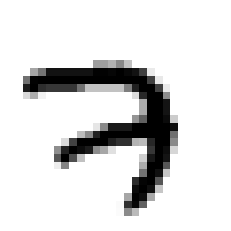

In [6]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


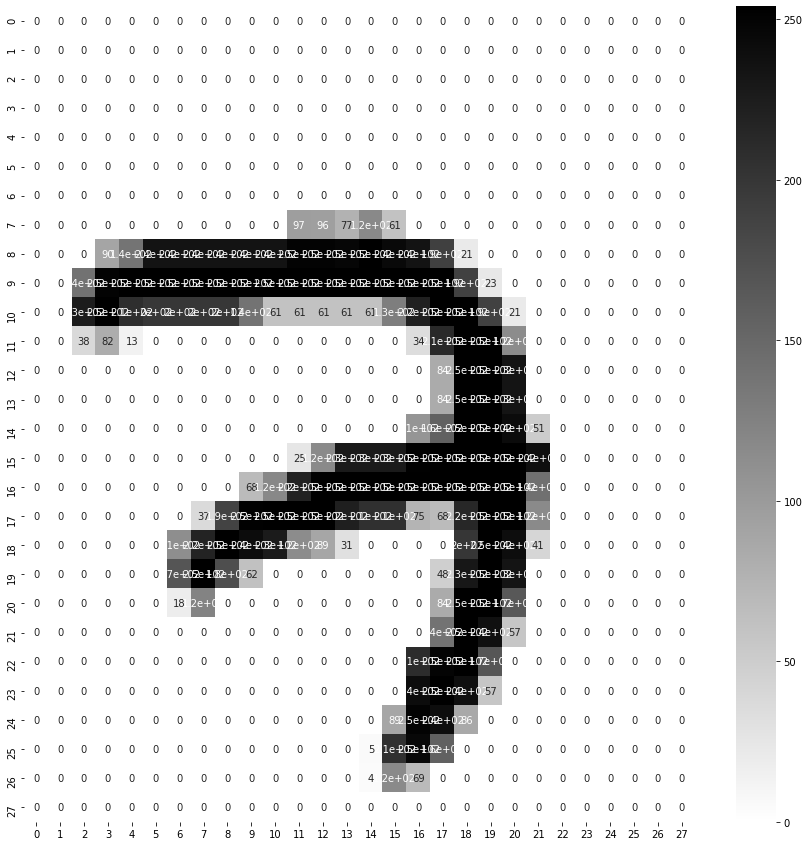

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [8]:
# actual value of y_train
y_train[0]

7

In [9]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [10]:
model_clf.layers

In [11]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [13]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [14]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [15]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [16]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [17]:
type(hidden1.get_weights())

list

In [18]:
hidden1.get_weights()

[array([[-0.0741937 , -0.04797336, -0.02186478, ..., -0.02803634,
          0.00124493, -0.06362347],
        [-0.04419304, -0.05276359, -0.02382611, ..., -0.04478851,
         -0.02810185, -0.01603518],
        [-0.07040861,  0.06552225,  0.04439538, ...,  0.06166866,
          0.05383766, -0.03129616],
        ...,
        [-0.03822068,  0.0039391 , -0.02456319, ..., -0.06224403,
         -0.02677783, -0.06704988],
        [-0.00569844,  0.00893954, -0.0638804 , ..., -0.00802033,
          0.05425113,  0.06848437],
        [ 0.04518834, -0.04590769,  0.0603164 , ...,  0.06387569,
         -0.00248704, -0.01483553]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[-0.0741937 , -0.04797336, -0.02186478, ..., -0.02803634,
         0.00124493, -0.06362347],
       [-0.04419304, -0.05276359, -0.02382611, ..., -0.04478851,
        -0.02810185, -0.01603518],
       [-0.07040861,  0.06552225,  0.04439538, ...,  0.06166866,
         0.05383766, -0.03129616],
       ...,
       [-0.03822068,  0.0039391 , -0.02456319, ..., -0.06224403,
        -0.02677783, -0.06704988],
       [-0.00569844,  0.00893954, -0.0638804 , ..., -0.00802033,
         0.05425113,  0.06848437],
       [ 0.04518834, -0.04590769,  0.0603164 , ...,  0.06387569,
        -0.00248704, -0.01483553]], dtype=float32)

In [21]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [23]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

### Unscaled and epochs increased


In [24]:
# EPOCHS = 30
EPOCHS = 200

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Epoch 1/200
1719/1719 [==============================] - 5s 2ms/step - loss: 45854089818040322582642688.0000 - accuracy: 0.1123 - val_loss: 2.3016 - val_accuracy: 0.1126
Epoch 2/200
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3062 - accuracy: 0.1106 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 3/200
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1127 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 4/200
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3009 - accuracy: 0.1154 - val_loss: 2.3014 - val_accuracy: 0.1126
Epoch 5/200
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1113 - val_loss: 2.3014 - val_accuracy: 0.1126
Epoch 6/200
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3012 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 7/200
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3010 - accuracy: 0.1125 - 

In [25]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [26]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_05_21_20_42_03_.h5


In [27]:
history.params


{'epochs': 200, 'steps': 1719, 'verbose': 1}

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,9.607874e+24,0.112491,2.301611,0.1126
1,2.305954e+00,0.112345,2.301317,0.1126
2,2.301313e+00,0.112345,2.301343,0.1126
3,2.301289e+00,0.112345,2.301370,0.1126
4,2.301306e+00,0.112345,2.301421,0.1126
...,...,...,...,...
195,2.301304e+00,0.112345,2.301311,0.1126
196,2.301302e+00,0.112345,2.301353,0.1126
197,2.301290e+00,0.112345,2.301610,0.1126
198,2.301316e+00,0.112345,2.301407,0.1126


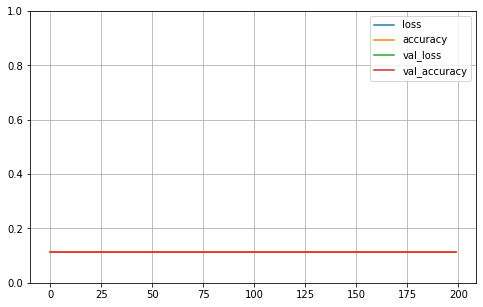

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1135


[2.3009793758392334, 0.11349999904632568]

In [31]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0.1 , 0.11, 0.1 , 0.1 , 0.1 , 0.09, 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.11, 0.1 , 0.1 , 0.1 , 0.09, 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.11, 0.1 , 0.1 , 0.1 , 0.09, 0.1 , 0.1 , 0.1 , 0.1 ]],
      dtype=float32)

In [32]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([1, 1, 1])

In [33]:
y_test_new = y_test[:3]

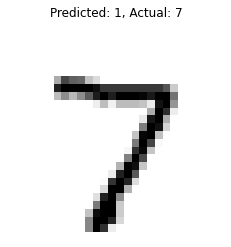

------------------------------------------------------------


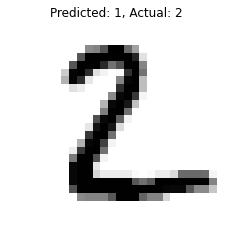

------------------------------------------------------------


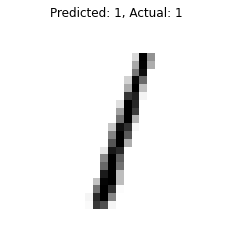

------------------------------------------------------------


In [34]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [35]:
weights, biases = hidden1.get_weights()


In [36]:
weights

array([[-0.0741937 , -0.04797336, -0.02186478, ..., -0.02803634,
         0.00124493, -0.06362347],
       [-0.04419304, -0.05276359, -0.02382611, ..., -0.04478851,
        -0.02810185, -0.01603518],
       [-0.07040861,  0.06552225,  0.04439538, ...,  0.06166866,
         0.05383766, -0.03129616],
       ...,
       [-0.03822068,  0.0039391 , -0.02456319, ..., -0.06224403,
        -0.02677783, -0.06704988],
       [-0.00569844,  0.00893954, -0.0638804 , ..., -0.00802033,
         0.05425113,  0.06848437],
       [ 0.04518834, -0.04590769,  0.0603164 , ...,  0.06387569,
        -0.00248704, -0.01483553]], dtype=float32)

In [37]:
biases

array([-1.08531315e-03, -2.22957518e-04, -1.13669284e-01, -1.06803533e-02,
       -2.13229723e-04, -3.40620667e-04, -7.91815983e-04, -2.08779005e-04,
       -2.05260527e-04, -4.52724751e-03, -1.00065966e-03, -3.29091505e-04,
       -1.23228729e-01, -2.37174521e-04, -1.00047290e-02, -5.03160477e-01,
       -3.23196075e+02, -3.19161778e-03, -1.36642740e-03, -1.25079951e-03,
       -9.46236800e+07, -4.78116013e-02, -3.50768532e-04, -4.88400925e-04,
       -2.58288404e-04, -4.60391602e-04, -8.69090110e-03, -9.17254889e-04,
       -2.21481221e-03, -6.23957440e-03, -7.85333803e-04, -5.26669016e-03,
       -1.19519338e-03, -1.47812255e-03, -8.59791937e-04, -3.44886333e-02,
       -2.22132224e+08, -1.45748840e-03, -5.92696539e-04, -1.36985409e-03,
       -3.04152869e-04, -6.14973716e-04, -7.57591724e+00, -1.51749945e-03,
       -1.72855565e-03, -3.73490300e-04, -4.57677804e-03, -2.60393578e-03,
       -4.92529536e-04, -1.26075733e-03, -1.89643615e-04, -6.90379005e-04,
       -7.66103789e-02, -